<img align="center" src="./images/occiput_logo3.png" width="400">

# DE RENZO PHANTOM acquired on Siemens Biograph mMR 
Load listmode data of DeRenzo physical phantom acquired on Siemens Biograph mMR and reconstruct using OSEM. Compare the reconstruction with the reconstruction obtained with the Siemens E7 Tools using the same parameters of the OSEM algorithm. 

In [4]:
import occiput
from occiput.Reconstruction.PET.PET_scanners import Biograph_mMR
from occiput.DataSources.FileSources import import_interfile_volume

In [5]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()

In [6]:
pet.set_scanner(Biograph_mMR)

In [7]:
pet.use_compression(False)

### LOAD MEASUREMENT DATA - 10 MINS

In [8]:
datapath = '../../data/PET_data/scans/2015_05_20_deRenzo/'

In [9]:
listmode = 0
if (listmode == 1):
    pet.import_listmode(datapath+'listmode_and_sensitivity/PET_ACQ_1014_20150520090638-0.l.hdr')
    pet.export_prompts(datapath+'prompts.h5')
    pet.export_randoms(datapath+'randoms.h5')
else:
    pet.import_prompts(datapath+'prompts.h5')
    pet.import_randoms(datapath+'randoms.h5')

In [10]:
pet.use_compression(False)

In [11]:
# Import sensitivity
pet.import_sensitivity(datapath+'norm/norm3d_00.h33')

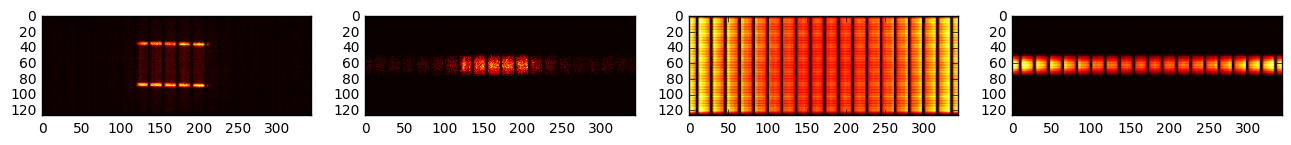

In [12]:
figure(figsize=[16,6])
subplot(1,4,1); imshow(pet.prompts.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(1,4,2); imshow(pet.prompts.to_nd_array()[0,0,:,:].transpose(), cmap='hot')
subplot(1,4,3); imshow(pet.sensitivity.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(1,4,4); imshow(pet.sensitivity.to_nd_array()[0,0,:,:].transpose(), cmap='hot')

In [13]:
#pet.set_activity_shape([128,128,128])
#pet.set_activity_size([128*pet.activity_size[0]/344.0,128*pet.activity_size[1]/344.0,128*pet.activity_size[2]/127.0])

### ITERATIVE RECONSTRUCTION

In [14]:
iterations = 63
subset_mode = "ordered_axial"
subset_size = 12

In [15]:
activity_recon = pet.osem_reconstruction(iterations=iterations, subset_mode=subset_mode, subset_size=subset_size)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


### Save result to file

In [17]:
activity_recon.export_image(datapath+'occiput/activity_recon.nii')

### Compare with reconstruction using Siemens E7 Tools

In [18]:
from occiput.DataSources.FileSources import import_interfile_volume
activity_recon_Siemens_no_corrections = import_interfile_volume(datapath+'recon_no_rand/recon__000_000.v.hdr')

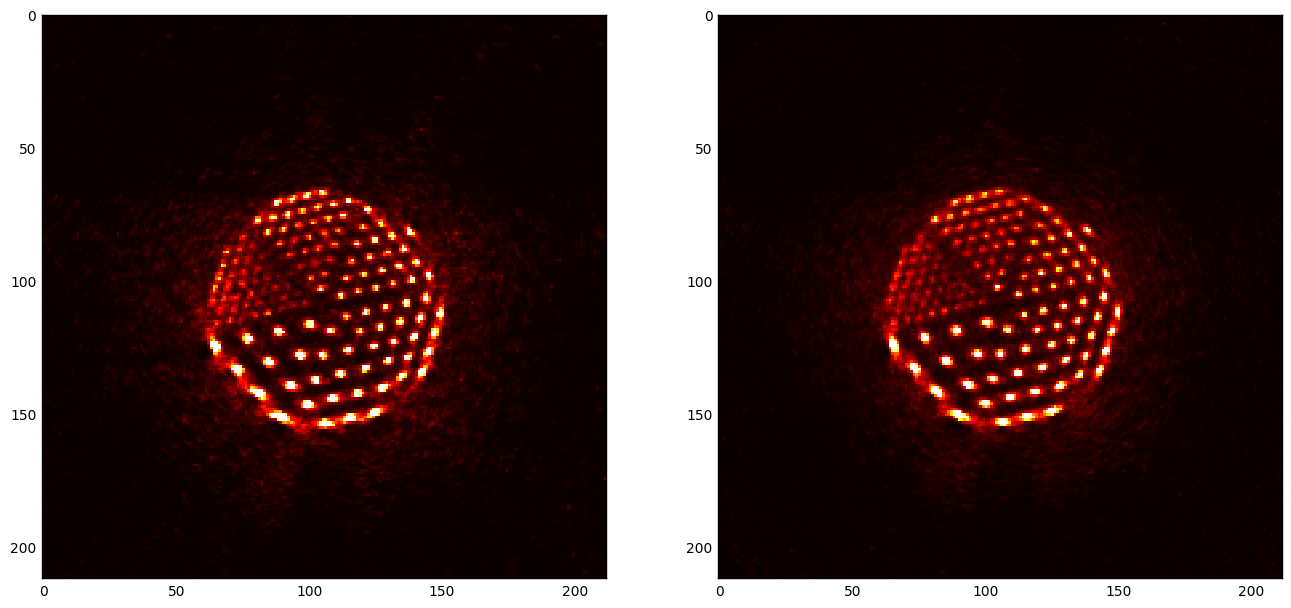

In [33]:
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity_recon.data[60:272,60:272,64],vmax = 2.0, interpolation='nearest', cmap='hot')
subplot(1,2,2); imshow(activity_recon_Siemens_no_corrections.data[60:272,60:272,64],vmax = 0.1, interpolation='nearest', cmap='hot')